In [49]:
import os
import pickle

import matplotlib.pyplot as plt
import numpy as np

from scatseisnet import ScatteringNetwork

%config InlineBackend.figure_format = "svg"
import pickle
import matplotlib.dates as mdates
from obspy import Stream, Trace, UTCDateTime

from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import FastICA,PCA

plt.rcParams["date.converter"] = "concise"
%config InlineBackend.figure_format = "svg"

In [50]:
# Load the test data from the provided file
with np.load("scattering_coefficientsTest.npz", allow_pickle=True) as data:
    order_1_test = data["order_1"]
    order_2_test = data["order_2"]
    times = data["times"]

# Reshape and stack scattering coefficients of all orders for the test data
order_1_test = order_1_test.reshape(order_1_test.shape[0], -1)
order_2_test = order_2_test.reshape(order_2_test.shape[0], -1)
scattering_coefficients_test = np.hstack((order_1_test, order_2_test))

# Transform into log for the test data
scattering_coefficients_test = np.log(scattering_coefficients_test)
pca_model = PCA(n_components=10, whiten=True)
pca_features = pca_model.fit_transform(scattering_coefficients_test)
#pca_features = pca_model.transform(scattering_coefficients_test)# Normalize features for display
features_normalized = pca_features / np.abs(pca_features).max(axis=0)




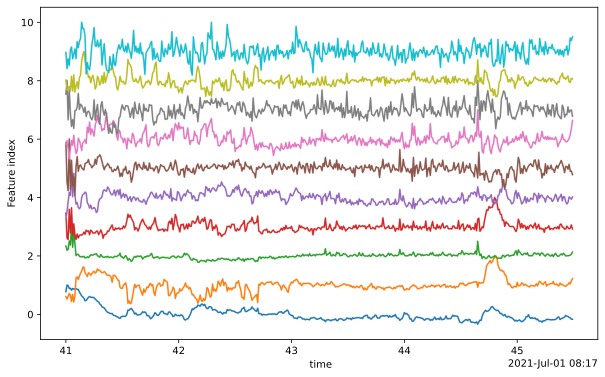

In [51]:


# Figure instance
fig = plt.figure(figsize=(10, 6), dpi=200)
ax = plt.axes()

# Plot features
ax.plot(times, features_normalized + np.arange(pca_features.shape[1]), rasterized=True)

# Labels
ax.set_ylabel("Feature index")
ax.set_xlabel(" time")

# Show
plt.show()


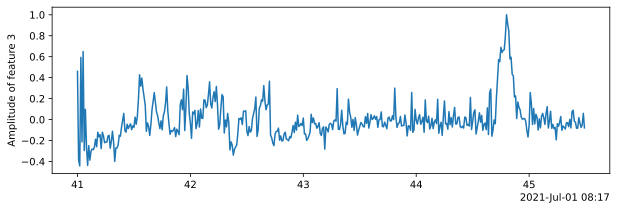

In [52]:
# Pick a feature
feature_id = 3
feature = features_normalized[:, feature_id]

# Figure creation
fig = plt.figure(figsize=(10,3))
ax = plt.axes()

# Plot the weights
ax.plot(times, feature)
ax.set_ylabel(f"Amplitude of feature {feature_id}")

# Show
plt.show()

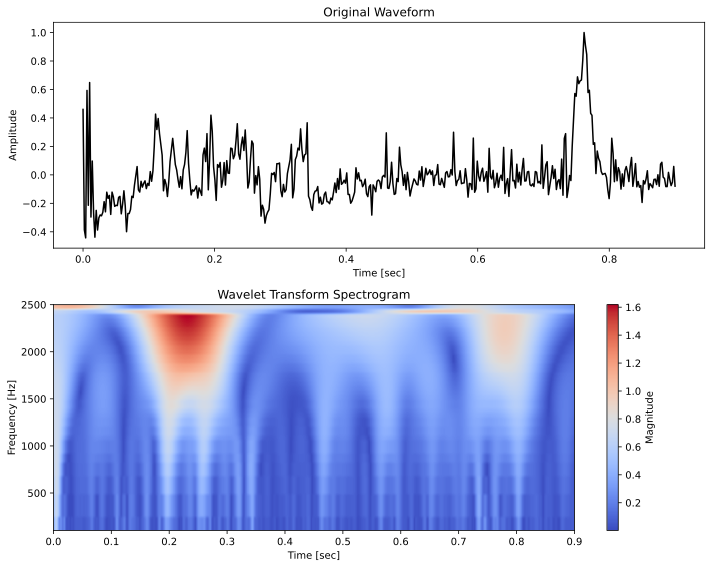

In [58]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet

fs = 5000  # Fréquence d'échantillonnage
fc = 1

num_scales = 50  # Nombre de points d'échelle
s_min = fs * fc / 2000
s_max = fs * fc / 100
widths = np.logspace(np.log10(s_min), np.log10(s_max), num_scales).astype(int) 

# Conversion des échelles en fréquences réelles pour l'affichage
frequencies = fs * fc / widths

Zxx = cwt(feature, morlet, widths)

# Création du temps correspondant aux données
times = np.linspace(0, 10*len(feature) / fs, num=len(feature))

# Affichage
fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(times, feature, color = 'k')
axs[0].set_title('Original Waveform')
axs[0].set_xlabel('Time [sec]')
axs[0].set_ylabel('Amplitude')   

pcm = axs[1].imshow(np.abs(Zxx), extent=[times.min(), times.max(), frequencies.min(), frequencies.max()], cmap='coolwarm', aspect='auto', origin='lower')
axs[1].set_title('Wavelet Transform Spectrogram')
axs[1].set_xlabel('Time [sec]')
axs[1].set_ylabel('Frequency [Hz]')
fig.colorbar(pcm, ax=axs[1], label='Magnitude')
plt.tight_layout()
plt.show()


In [53]:
# Filter the data for the new specified date and time range: 07/01/2021 08:17:41 to 08:17:49
import pandas as pd

file_path = 'bubble_summary.csv'
data = pd.read_csv(file_path)

# Split the combined column into separate columns
data = data['Month,Date,Hour,Minute,Second,Milisec,Sampling_rate,Subsection'].str.split(',', expand=True)
data.columns = ['Month', 'Date', 'Hour', 'Minute', 'Second', 'Milisec', 'Sampling_rate', 'Subsection']

# Convert the relevant columns to integers to facilitate filtering
data[['Month', 'Date', 'Hour', 'Minute', 'Second']] = data[['Month', 'Date', 'Hour', 'Minute', 'Second']].apply(pd.to_numeric)

filtered_data_extended = data[
    (data['Date'] == 1) &
    (data['Month'] == 7) &
    (data['Hour'] == 8) &
    (data['Minute'] == 17) &
    ((data['Second'] >= 41) | ((data['Minute'] == 18) & (data['Second'] <= 8)))
]

filtered_data_extended


,Month,Date,Hour,Minute,Second,Milisec,Sampling_rate,Subsection
19413,7,1,8,17,41,602,5000,ch130_170
19414,7,1,8,17,44,55,5000,ch130_170
19415,7,1,8,17,45,515,5000,ch130_170
19416,7,1,8,17,45,965,5000,ch130_170
19417,7,1,8,17,46,818,5000,ch130_170
19418,7,1,8,17,46,988,5000,ch130_170
19419,7,1,8,17,47,601,5000,ch130_170
19420,7,1,8,17,48,116,5000,ch130_170
19421,7,1,8,17,48,222,5000,ch130_170
19422,7,1,8,17,48,401,5000,ch130_170


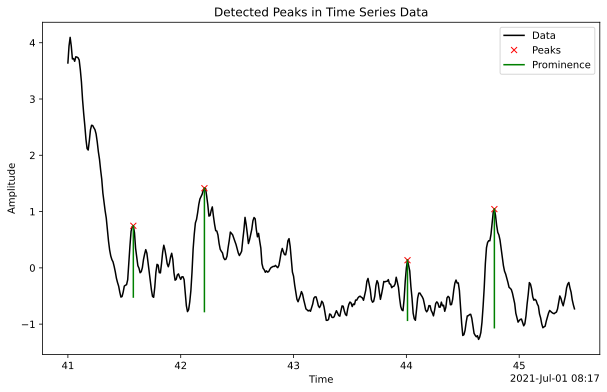

['2021-07-01 08:17:41.580',
 '2021-07-01 08:17:42.210',
 '2021-07-01 08:17:44.010',
 '2021-07-01 08:17:44.780']

In [54]:
from scipy.ndimage import uniform_filter1d
from scipy.signal import find_peaks



def detect_and_plot_peaks(data, times, prominence=0.1, width=None, distance=None):
    
    from scipy.signal import find_peaks
    import matplotlib.pyplot as plt
    
    # Detect peaks
    peaks, properties = find_peaks(data, prominence=prominence, width=width, distance=distance)
    
    # Extract the peak times
    peak_times = times[peaks]
    peak_times_str = [t.strftime('%Y-%m-%d %H:%M:%S.%f')[:-3] for t in peak_times]
    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(times, data, label='Data', color='black')
    ax.plot(peak_times, data[peaks], "x", label='Peaks', color='red')
    
    # Marking the prominence on the graph
    prominences = properties['prominences']
    for i, peak in enumerate(peaks):
        ax.plot([times[peak], times[peak]], [data[peak] - prominences[i], data[peak]], color='green', label='Prominence' if i == 0 else "")
    
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.set_title('Detected Peaks in Time Series Data')
    ax.legend()
    
    # Return the peak times and the plot figure
    return peak_times_str, fig



peak_times_str_dynamic, fig = detect_and_plot_peaks(smoothed_featu, times, prominence=1)
plt.show()
peak_times_str_dynamic

In [55]:
def match_with_tolerance(data_df, peak_times, tolerance_ms=30, year=2021):
   
    

    from pandas import Timedelta
    
    # Ensure DateTime column is correctly formatted
    df = data_df.copy()
    df['DateTime'] = pd.to_datetime(df[['Month', 'Date', 'Hour', 'Minute', 'Second', 'Milisec']].astype(str).agg('-'.join, axis=1), errors='coerce', format='%m-%d-%H-%M-%S-%f')
    df['DateTime'] = df['DateTime'].apply(lambda x: x.replace(year=year))

    # Initialize an empty DataFrame to hold all matches
    all_matches = pd.DataFrame()

    # Check each peak time against the data within the tolerance window
    for peak_time in peak_times:
        lower_bound = peak_time - Timedelta(milliseconds=tolerance_ms)
        upper_bound = peak_time + Timedelta(milliseconds=tolerance_ms)
        matches = df[(df['DateTime'] >= lower_bound) & (df['DateTime'] <= upper_bound)]
        all_matches = pd.concat([all_matches, matches])

    return all_matches
    
import pandas as pd
from pandas import Timedelta

peak_times_dt = pd.to_datetime(peak_times_str_dynamic)

matches_with_tolerance = match_with_tolerance(filtered_data_extended, peak_times_dt, tolerance_ms=100)
print(matches_with_tolerance)



       Month  Date  Hour  Minute  Second Milisec Sampling_rate Subsection  \
19413      7     1     8      17      41     602          5000  ch130_170   
81559      7     1     8      17      41     638          5000  ch590_630   
81561      7     1     8      17      42     306          5000  ch590_630   
81564      7     1     8      17      43     998          5000  ch590_630   
81565      7     1     8      17      44     107          5000  ch590_630   

                     DateTime  
19413 2021-07-01 08:17:41.602  
81559 2021-07-01 08:17:41.638  
81561 2021-07-01 08:17:42.306  
81564 2021-07-01 08:17:43.998  
81565 2021-07-01 08:17:44.107  
